
Accuracy: 0.8053435114503816

Confusion Matrix:
 [[133  26]
 [ 25  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       159
           1       0.75      0.76      0.75       103

    accuracy                           0.81       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



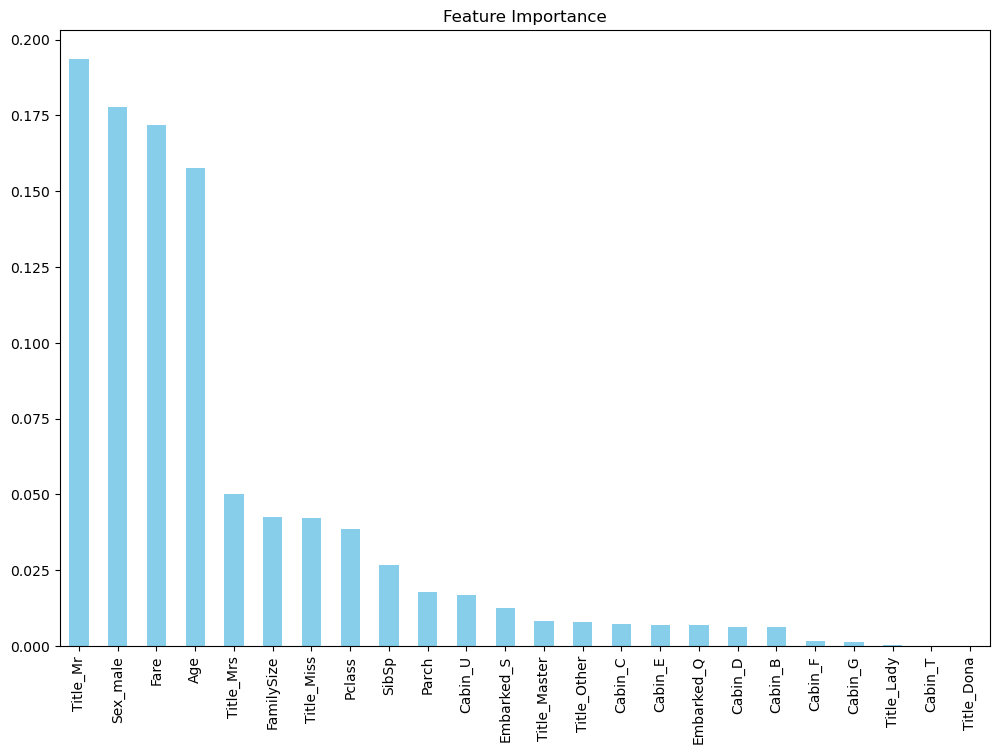

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('titanic_dataset.csv')

# --- Data Preprocessing ---

# Extract Title from Name before dropping the column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Drop irrelevant columns
df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# Fill missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle Cabin column (use first letter or 'U' for unknown)
df.loc[:, 'Cabin'] = df['Cabin'].fillna('U').map(lambda x: x[0])

# Feature Engineering - Create a Family Size feature
df.loc[:, 'FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Group uncommon titles
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(
    ['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Capt', 'Jonkheer', 'Don'], 'Other'
)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin', 'Title'], drop_first=True)

# --- Split data into training and test sets ---
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model Training ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Model Evaluation ---
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Feature Importance ---
plt.figure(figsize=(12, 8))
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()
